In [77]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df =pd.read_csv('vgsales.csv')

In [79]:
df.head(2)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [4]:
df.shape

(16598, 11)

In [5]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df.isnull()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [7]:
da = df.isnull().sum()
da

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [11]:
YAS = df['year'].isnull().sum()
YAS

271

In [12]:
Pub = df['publisher'].isnull().sum()
Pub

58

In [13]:
null_columns = df.columns[df.isnull().any()]
for column in null_columns:
    print(f"Missing values in column '{column}': {df[column].isnull().sum()}")

Missing values in column 'year': 271
Missing values in column 'publisher': 58


In [14]:
null_mask = df.isnull()
null_rows = df[null_mask.any(axis=1)]

ds = pd.DataFrame(null_rows)
ds.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


In [15]:
mode_value = df['year'].mode()[0]
df['year'].fillna(mode_value, inplace=True)

In [16]:
null_mask = df.isnull()
null_rows = df[null_mask.any(axis=1)]

ds = pd.DataFrame(null_rows)
ds.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
470,471,wwe Smackdown vs. Raw 2006,PS2,2009.0,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
1303,1305,Triple Play 99,PS,2009.0,Sports,NaN,0.81,0.55,0.0,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.0,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,2009.0,Platform,NaN,0.00,0.48,0.0,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.0,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.0,0.01,0.42


In [17]:
YAS = df['year'].isnull().sum()
YAS

0

In [80]:
mode_value = df['publisher'].mode()[0]
df['publisher'].fillna(mode_value, inplace=True)
print(mode_value)

Electronic Arts


In [19]:
null_mask = df.isnull()
null_rows = df[null_mask.any(axis=1)]

ds = pd.DataFrame(null_rows)
ds.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales


In [81]:
Pub = df['publisher'].isnull().sum()
Pub

0

In [82]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
da = df.isnull().sum()
da

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [23]:
all_genres = df['genre'].value_counts()
print(all_genres)

genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64


# INFO

#### Rank - Depicts the video game which is having the high overall sales 

#### Name - Names of the Video Games

#### Platform  - In which the Video Game is supported 

#### Year - Year in which the video game is released

#### Genre - The most widely used game classifying system categorizes games into eight genres: action, adventure, fighting, puzzle, role-playing, simulation, sports, and strategy.

#### Publisher - The company which released the game

#### NA_Sales - Sales of  Video Game ever recorded in North America

#### EU_Sales - Sales of  Video Game ever recorded in Europe

#### JP_Sales - Sales of  Video Game ever recorded in Japan

#### Other_Sales - Sales of  Video Game ever recorded in Every other country except NA, EU and JP

#### Global_Sales - Sales of all Video Games ever recorded all Countries world wide


### Some Important Information about Gaming Platfoms

#### WS -- The WonderSwan is a handheld game console released in Japan by Bandai. It was developed by Gunpei Yokoi's company Koto Laboratory and Bandai.

#### 3DO -- The 3DO Interactive Multiplayer, also referred to as simply 3DO, is a home video game console developed by The 3DO Company.

#### DC -- Sega's Dreamcast is the first console of the generation and had several features to show an advantage from the competition, including Internet gaming as an optional feature through its built-in modem, and a web browser.

#### SAT -- The Sega Saturn is a home video game console developed by Sega and released on November 22, 1994.

#### SCD -- The Sega CD plays CD-based games and adds hardware functionality such as a faster central processing unit and graphic enhancements like sprite scaling.

#### 2600 -- The Atari 2600 is a home video game console developed and produced by Atari, Inc. Released in September 1977.

#### PS -- PlayStation Network's services are dedicated to an online marketplace (PlayStation Store), a premium subscription service for enhanced gaming and social features (PlayStation Plus), music streaming (PlayStation Music, based on Spotify),TV streaming (PlayStation Vue), and formerly a cloud gaming service

#### PSP -- The PlayStation Portable (PSP) is a handheld game console developed and marketed by Sony Interactive Entertainment.

#### PCFX -- The PC-FX is a 32-bit home video game console developed by NEC and Hudson Soft. It was released in 1994 and discontinued in February 1998

#### PS2 -- The PlayStation 2 (PS2) is a home video game console developed and marketed by Sony Interactive Entertainment.

#### PSV -- The PlayStation Vita (PS Vita, or Vita) is a handheld game console developed and marketed by Sony Interactive Entertainment.

#### PS3 -- The PlayStation 3 (PS3) is a home video game console developed and marketed by Sony Interactive Entertainment. The successor to the PlayStation 2, it is part of the PlayStation brand of consoles.

#### TG16 -- The TurboGrafx-16, known as the PC Engine outside North America, is a home video game console designed by Hudson Soft and sold by NEC Home Electronics.

#### PS4 -- The PlayStation 4 (PS4) is a home video game console developed by Sony Interactive Entertainment. Announced as the successor to the PlayStation 3, it is part of the PlayStation brand of consoles.

#### PC -- A personal computer game, also known as computer game or abbreviated PC game, is a electronic game ·

#### N64 -- The Nintendo 64 (N64) is a home video game console developed by Nintendo.

#### GB -- The Game Boy is an 8-bit fourth generation handheld game console developed and manufactured by Nintendo.

#### Wii -- The Wii is a home video game console developed and marketed by Nintendo.

#### WiiU -- Wii is a series of simulation games published by Nintendo for the game console of the same name, as well as its successor, the Wii U.

#### DS -- The Nintendo DS is a handheld game console manufactured by Nintendo and released worldwide from 2004 to 2005. DS is an acronym for "developer system" or "dual screen" and introduced new features characteristic of handheld games.

#### 3DS -- The Nintendo 3DS is a handheld game console produced by Nintendo. The console was announced in March 2010 and unveiled at E3 2010 as the successor to the Nintendo DS.

#### NES -- The NES features a number of groundbreaking games, such as the 1985 platform game Super Mario Bros. and the 1986 action-adventure games The Legend of Zelda.

#### SNES -- The Super Nintendo Entertainment System, commonly shortened to Super Nintendo, Super NES or SNES is a 16-bit home video game console developed by Nintendo.

#### GC -- The Nintendo GameCube is a home video game console developed and released by Nintendo.

#### GBA -- The Game Boy Advance (GBA) is a 32-bit handheld game console developed, manufactured and marketed by Nintendo as the successor to the Game Boy Color.

#### XB -- The Xbox is a home video game console manufactured by Microsoft that is the first installment in the Xbox series of video game consoles.

#### XONE -- The Xbox One is a home video game console developed by Microsoft. Announced in May 2013.

#### X360 -- The Xbox 360 is a home video game console developed by Microsoft. As the successor to the original Xbox, it is the second console in the Xbox series.

#### GG -- Guilty Gear, subtitled The Missing Link in Japan, is a 2D fighting video game developed by Team Neo Blood.

###### THE missing platforms are like stars that faded from the sky leaving behind a void of nostalgia.

# Analysis

## BAR PLOTS

### A simple bar chart that visualizes global sales of Top 10 games for different genres. 

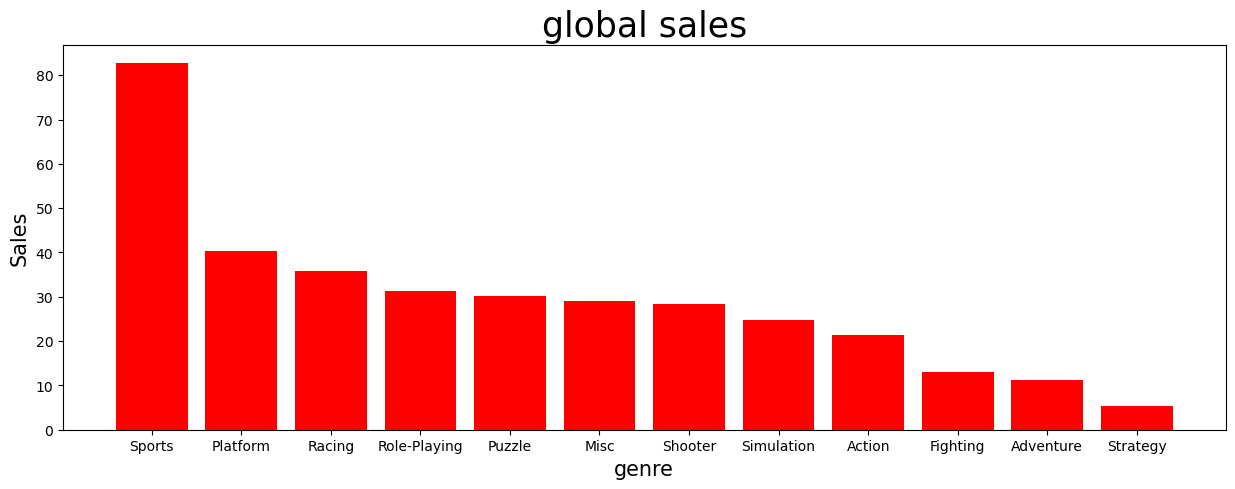

In [27]:
plt.figure(figsize=(15,5))
plt.bar(df.genre,df.global_sales,label='2x', color = 'red')
plt.title('global sales',fontsize=25)
plt.xlabel('genre',fontsize=15)
plt.ylabel('Sales',fontsize=15)

plt.show()

### A simple bar plot depicting the total count of games released for each GENRE

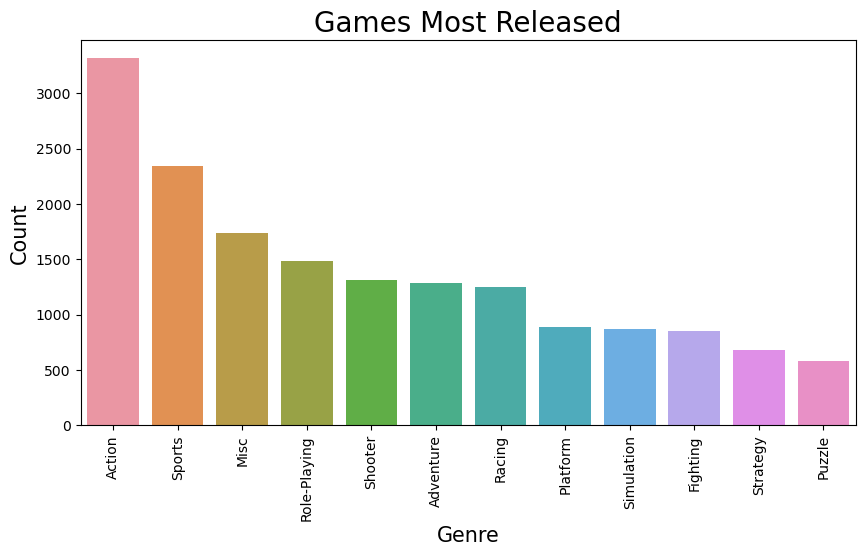

In [28]:
plt.figure(figsize=(10,5))

sns.countplot(x="genre", data=df, order = df['genre'].value_counts().index)  

#plt.xticks(rotation='vertical')

plt.title('Games Most Released',fontsize=20)  

plt.ylabel('Count',fontsize=15)        

plt.xlabel('Genre',fontsize=15)   

plt.xticks(rotation='vertical')

plt.show()

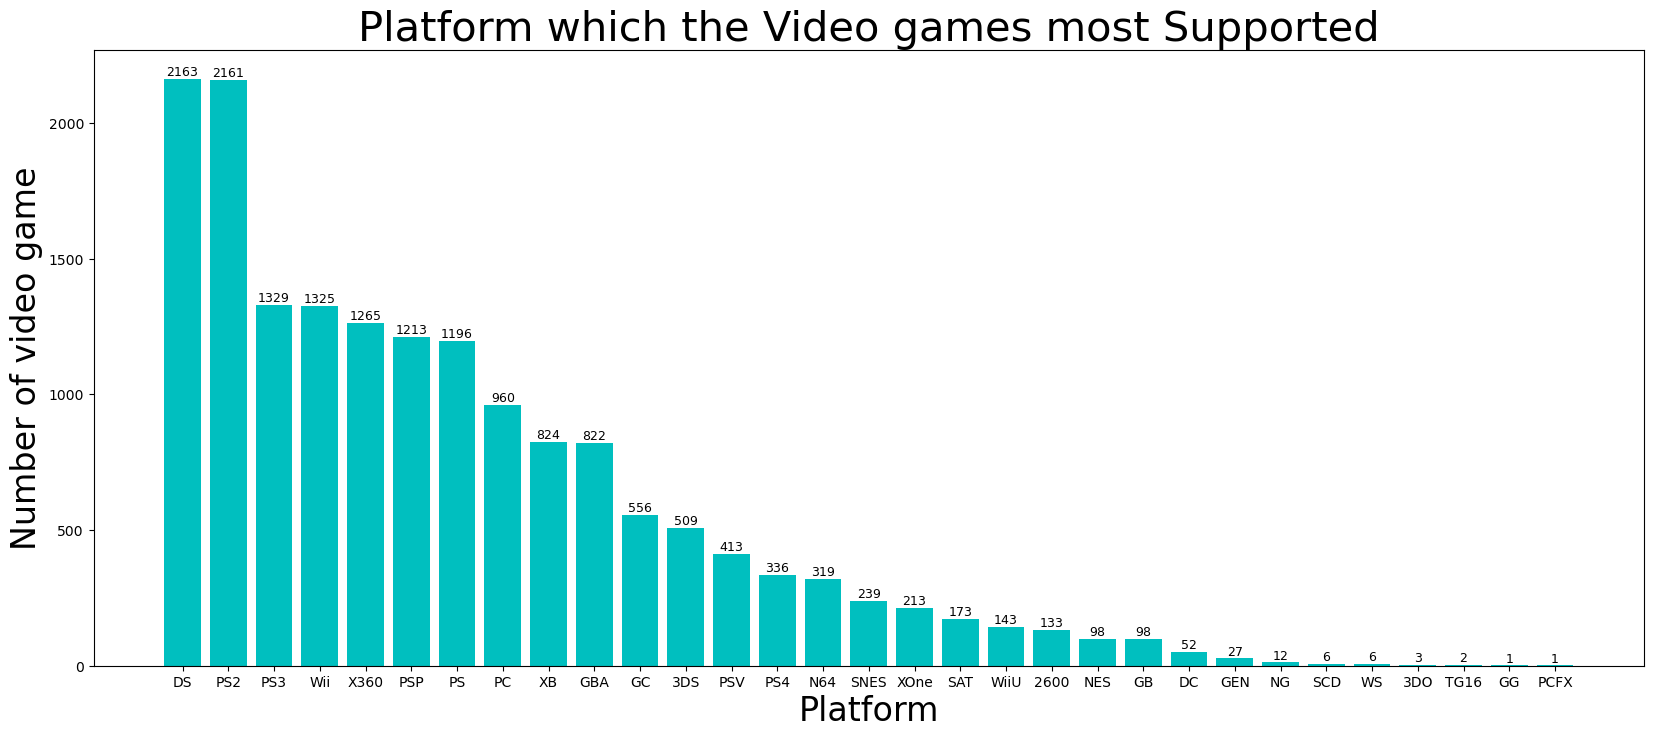

In [29]:
plt.figure(figsize=(20,8))

x = df["platform"].value_counts().index
y = df["platform"].value_counts().values
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.5, '%.0f' %height, ha='center', va='bottom', size = 9)
plt.title("Platform which the Video games most Supported", fontsize = 30)
plt.xlabel("Platform", fontsize = 24)
plt.ylabel("Number of video game", fontsize = 24)
plt.bar(x,y,color='c')
plt.show()

### This bar plot shows the highest number of games released for each year 

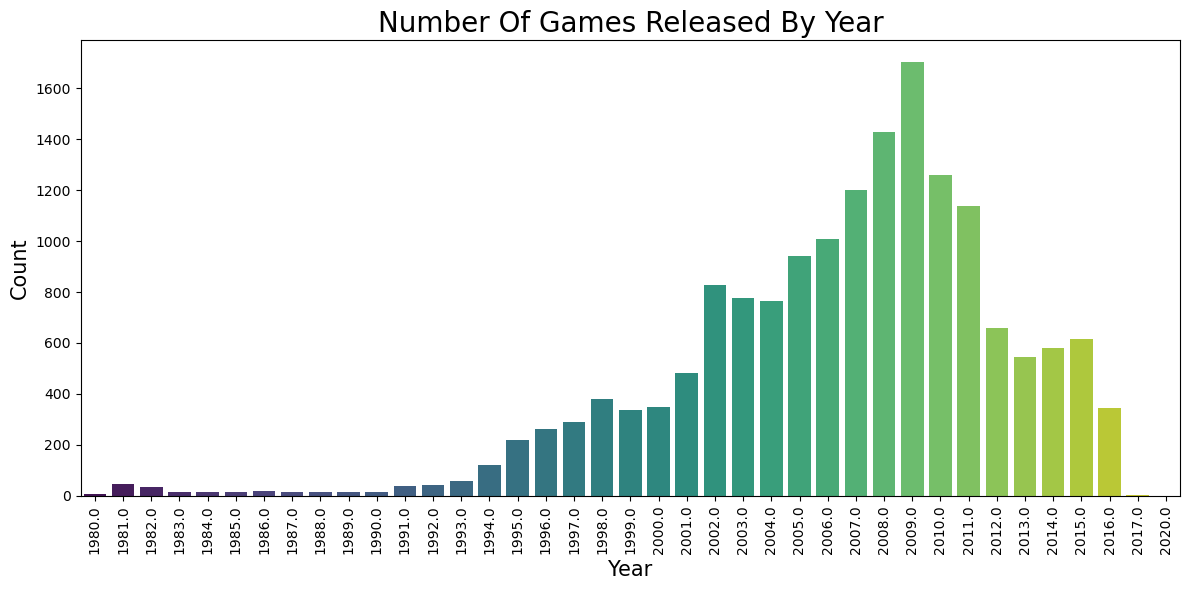

In [31]:
plt.figure(figsize=(12, 6))

order = df.groupby(by="year")["name"].count().index

sns.countplot(x="year", data=df, order=order, palette="viridis")

plt.title("Number Of Games Released By Year", fontsize=20)

plt.xlabel("Year", fontsize=15)

plt.ylabel("Count", fontsize=15)

plt.xticks(rotation="vertical")

plt.tight_layout()  

plt.show()

In [32]:
df['genre'].value_counts()

genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

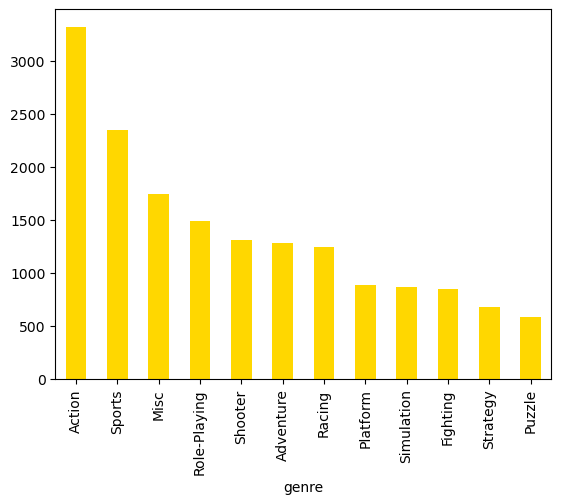

In [34]:
df[~(df.genre  == "unknown")].genre.value_counts().plot.bar(color = 'gold')
plt.show()

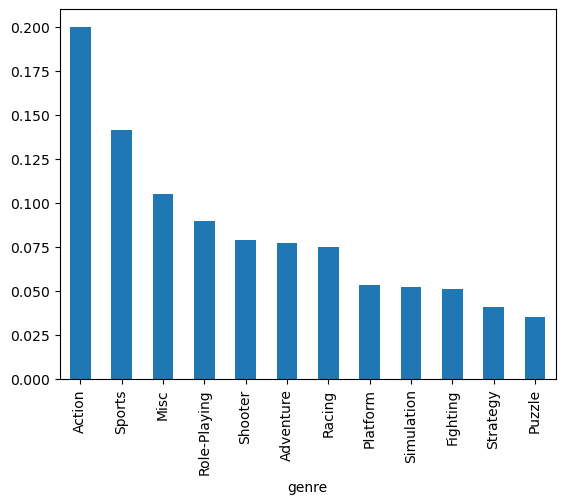

In [35]:
df[~(df.genre  == "unknown")].genre.value_counts(normalize = True).plot.bar()
plt.show()

### Bar plot showing the trend of sales each year 

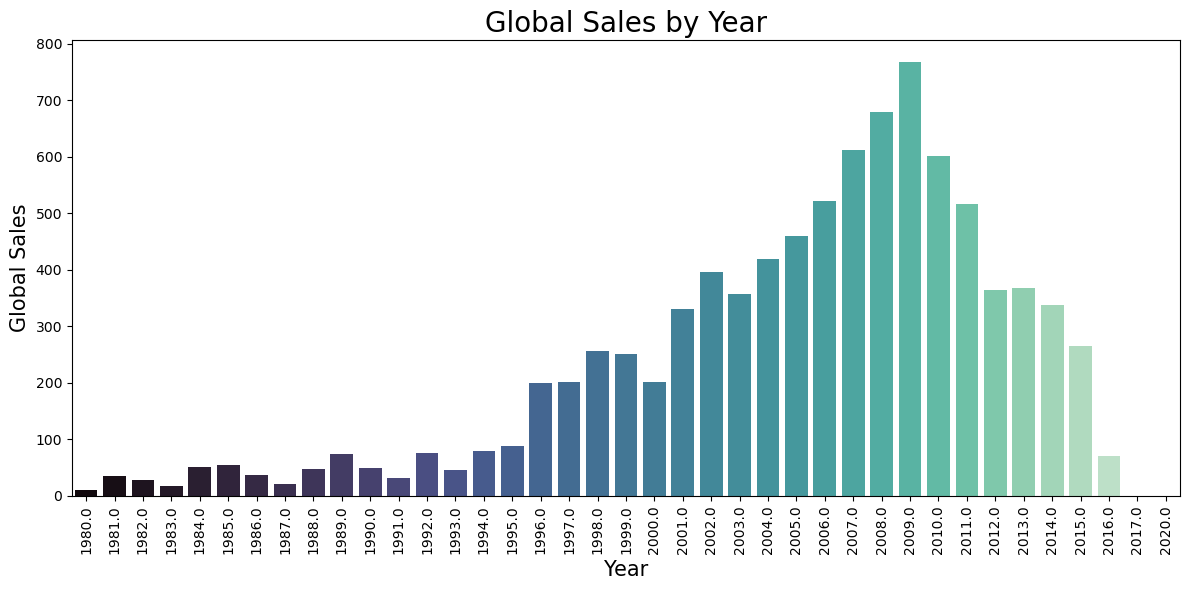

In [36]:
data_year = df.groupby(by=["year"])["global_sales"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="year", y="global_sales", data=data_year, palette="mako")
plt.xticks(rotation='vertical')
plt.title('Global Sales by Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Global Sales', fontsize=15)

plt.tight_layout()  

plt.show()

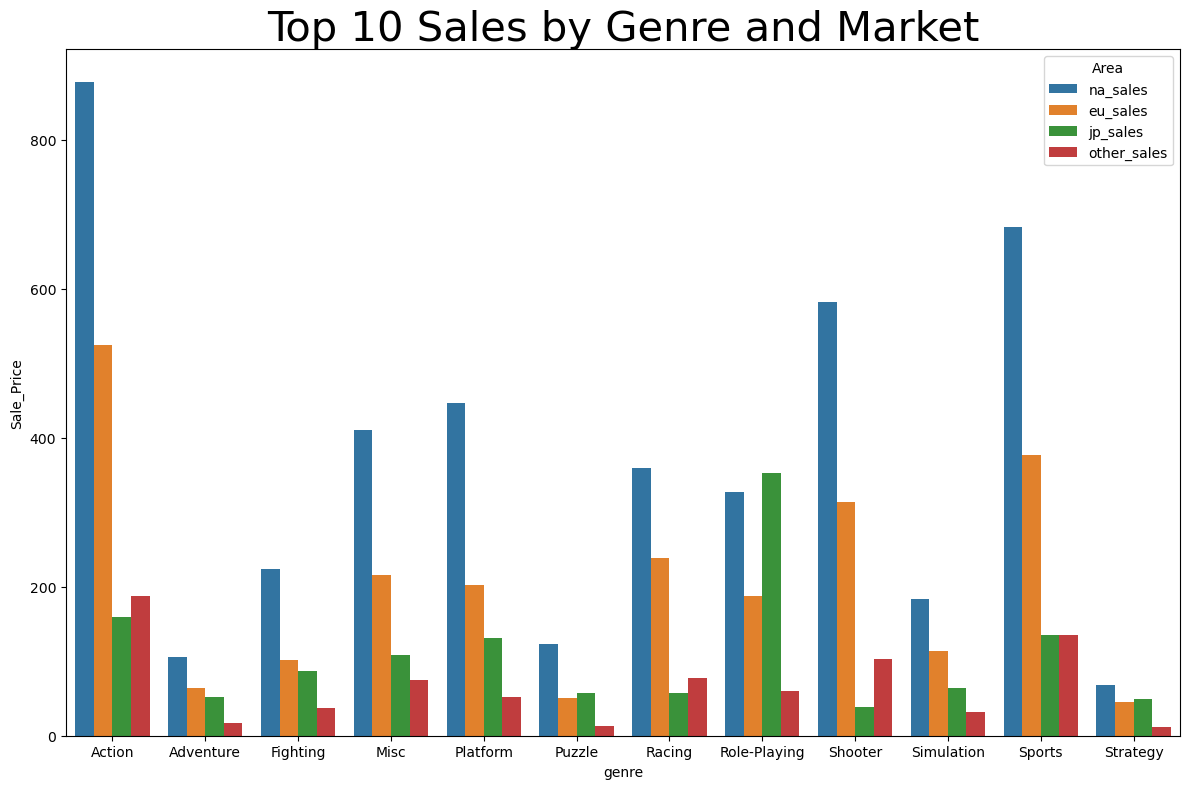

In [39]:
plt.figure(figsize=(12, 8))

G=df.groupby(["genre"]).sum()
Genres=G.reset_index()

Genres=pd.melt(Genres, id_vars=['genre'], value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], var_name='Area', value_name='Sale_Price')

sns.barplot(x="genre", y="Sale_Price", data=Genres, hue="Area")

plt.title('Top 10 Sales by Genre and Market', fontsize = 30)

plt.tight_layout()

plt.show()

In [83]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## SCATTER PLOT

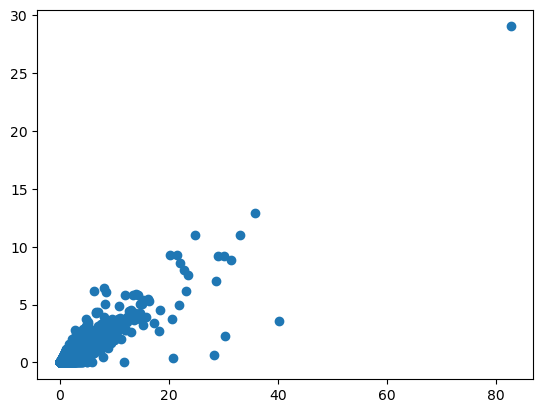

In [40]:
plt.scatter(df.global_sales,df.eu_sales)

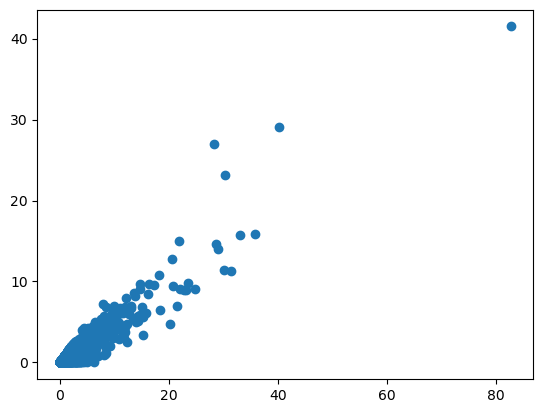

In [41]:
plt.scatter(df.global_sales,df.na_sales)

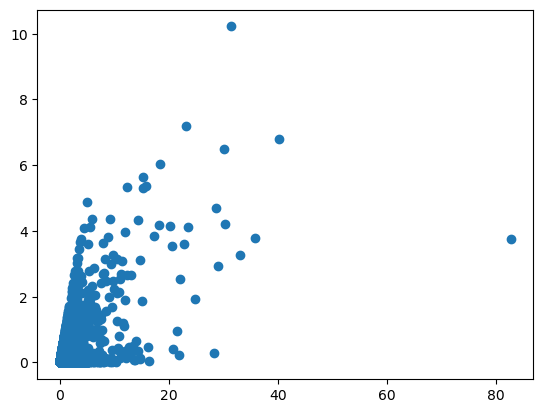

In [42]:
plt.scatter(df.global_sales,df.jp_sales)

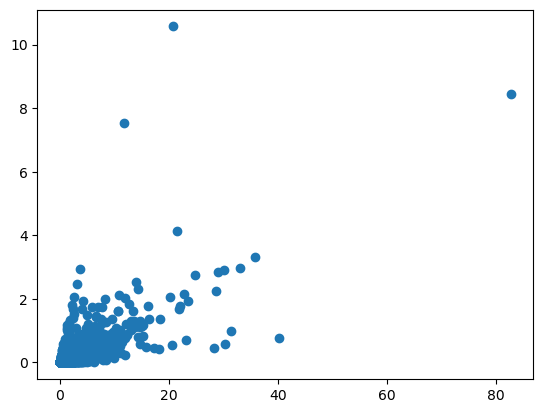

In [43]:
plt.scatter(df.global_sales,df.other_sales)

In [ ]:
plt.figure(figsize=(15, 10))

# Scatter plot 1
plt.subplot(2, 2, 1)
plt.scatter(df['Global_Sales'], df['Other_Sales'], color='blue', label='Other Sales')
plt.xlabel('Global Sales', fontsize=15)
plt.ylabel('Other Sales', fontsize=15)
plt.title('Scatter Plot of Global Sales vs Other Sales', fontsize=15)
plt.legend()
plt.grid(True)

# Scatter plot 2
plt.subplot(2, 2, 2)
plt.scatter(df['Global_Sales'], df['NA_Sales'], color='blue', label='NA Sales')
plt.xlabel('Global Sales', fontsize=15)
plt.ylabel('NA Sales', fontsize=15)
plt.title('Scatter Plot of Global Sales vs NA Sales', fontsize=15)
plt.legend()
plt.grid(True)

# Scatter plot 3
plt.subplot(2, 2, 3)
plt.scatter(df['Global_Sales'], df['JP_Sales'], color='blue', label='JP Sales')
plt.xlabel('Global Sales', fontsize=15)
plt.ylabel('JP Sales', fontsize=15)
plt.title('Scatter Plot of Global Sales vs JP Sales', fontsize=15)
plt.legend()
plt.grid(True)

# Scatter plot 4
plt.subplot(2, 2, 4)
plt.scatter(df['Global_Sales'], df['EU_Sales'], color='blue', label='EU Sales')
plt.xlabel('Global Sales', fontsize=15)
plt.ylabel('EU Sales', fontsize=15)
plt.title('Scatter Plot of Global Sales vs EU Sales', fontsize=15)
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()

## PIE CHARTS

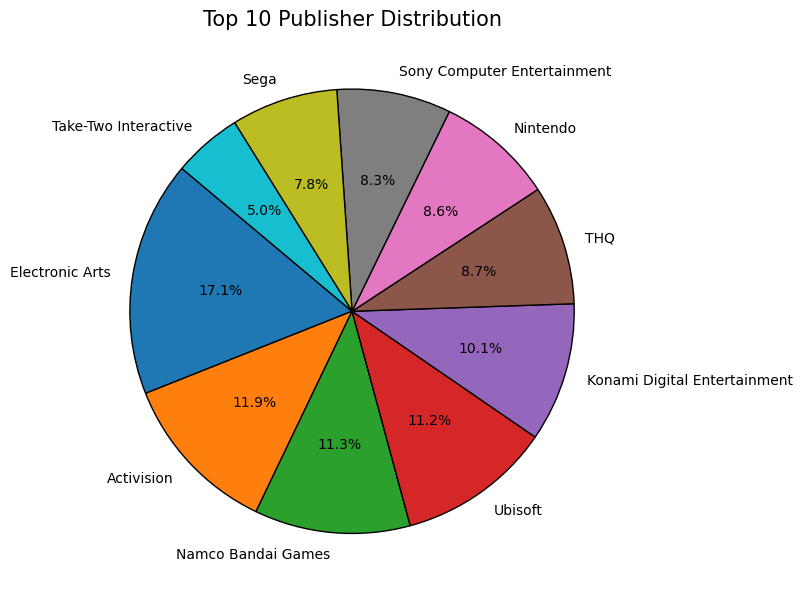

In [84]:
publisher_counts = df['publisher'].value_counts()

top_publishers = publisher_counts.head(10)

plt.figure(figsize=(8,8))

plt.pie(top_publishers, labels=top_publishers.index,wedgeprops={"edgecolor": "black"}, autopct='%1.1f%%', startangle=140)

plt.title('Top 10 Publisher Distribution', fontsize = 15)

plt.tight_layout()
plt.show()

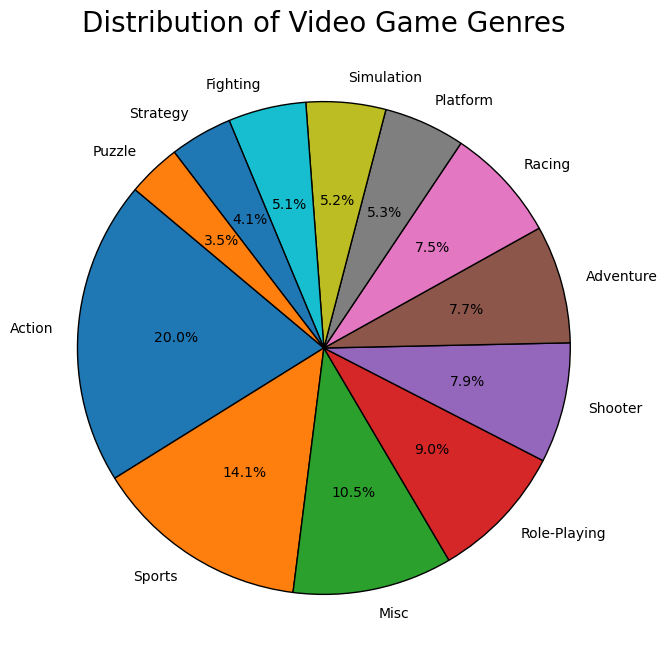

In [85]:
top_genres = df['genre'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(top_genres, labels=top_genres.index, wedgeprops={"edgecolor":"black"}, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Video Game Genres', fontsize=20)
plt.show()

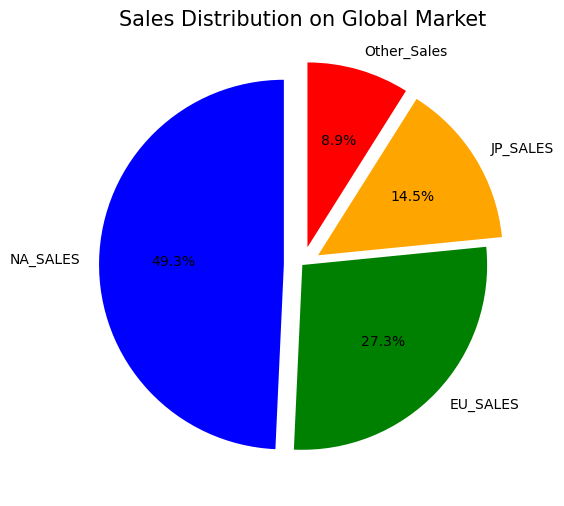

In [86]:
total_na_sales = df['na_sales'].sum()
total_eu_sales = df['eu_sales'].sum()
total_jp_sales = df['jp_sales'].sum()
total_other_sales = df['other_sales'].sum()

# Create a list of sales values for each region
sales_values = [total_na_sales, total_eu_sales, total_jp_sales, total_other_sales]
regions = ['NA_SALES', 'EU_SALES', 'JP_SALES', 'Other_Sales']

# Create a pie chart for the sales distribution
plt.figure(figsize=(6, 6))
plt.pie(sales_values, labels=regions,explode = [0.1,0,0.1,0.1], autopct="%1.1f%%", startangle=90, colors=['blue', 'green', 'orange', 'red'])
plt.title("Sales Distribution on Global Market", fontsize=15)
plt.show()

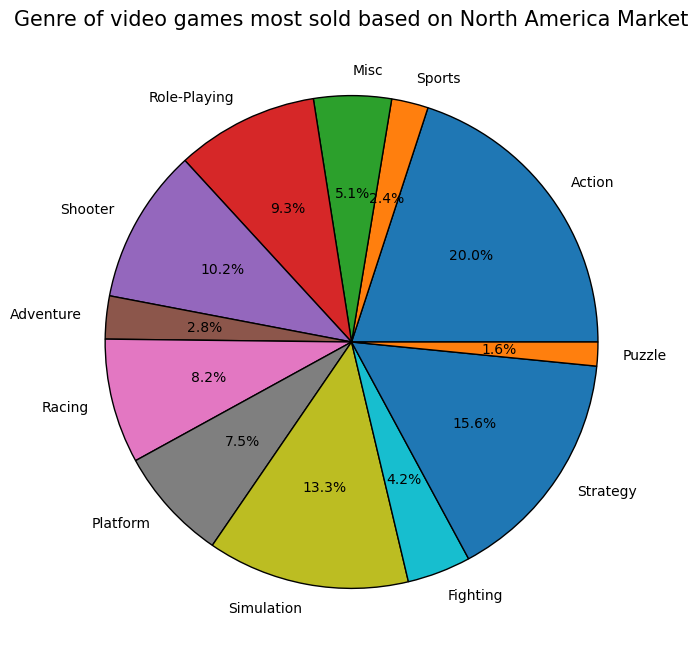

In [87]:
top_genres =df['genre'].value_counts()
NA_Sales = df.groupby('genre')['na_sales'].sum().values 

plt.figure(figsize=(8,8))

plt.pie(NA_Sales, labels=top_genres.index, wedgeprops={"edgecolor": "black"}, autopct="%1.1f%%")

plt.title("Genre of video games most sold based on North America Market", fontsize=15)

plt.show()


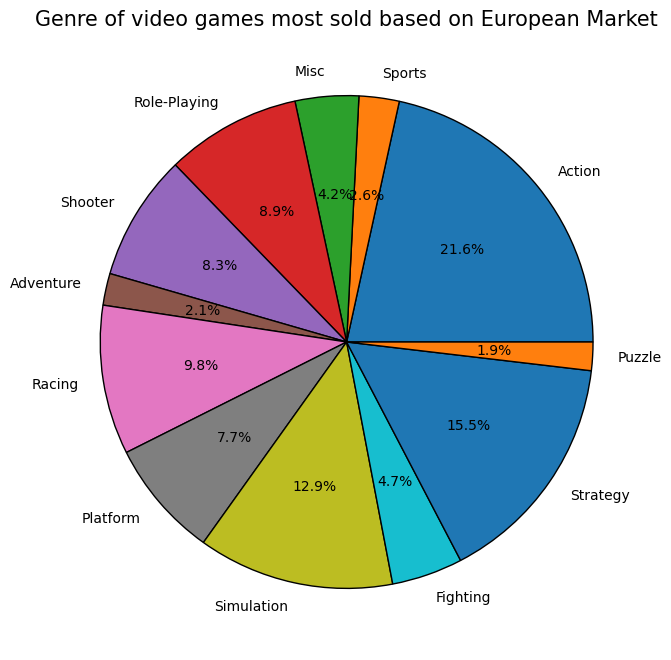

In [88]:
top_genres =df['genre'].value_counts()
EU_Sales = df.groupby('genre')['eu_sales'].sum().values 

plt.figure(figsize=(8,8))

plt.pie(EU_Sales, labels=top_genres.index, wedgeprops={"edgecolor": "black"}, autopct="%1.1f%%")

plt.title("Genre of video games most sold based on European Market", fontsize=15)

# plt.tight_layout()

plt.show()


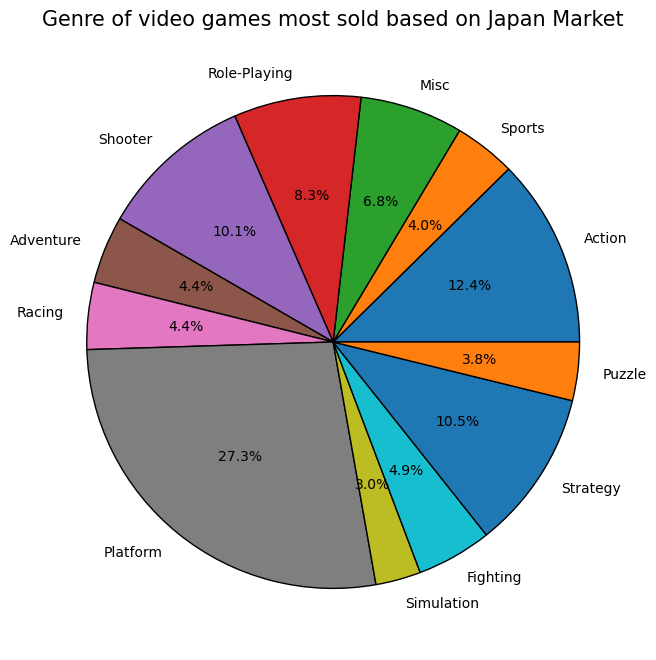

In [89]:
top_genres =df['genre'].value_counts()
JP_Sales = df.groupby('genre')['jp_sales'].sum().values  

plt.figure(figsize=(8,8))

plt.pie(JP_Sales, labels=top_genres.index, wedgeprops={"edgecolor": "black"}, autopct="%1.1f%%")

plt.title("Genre of video games most sold based on Japan Market", fontsize=15)

plt.show()


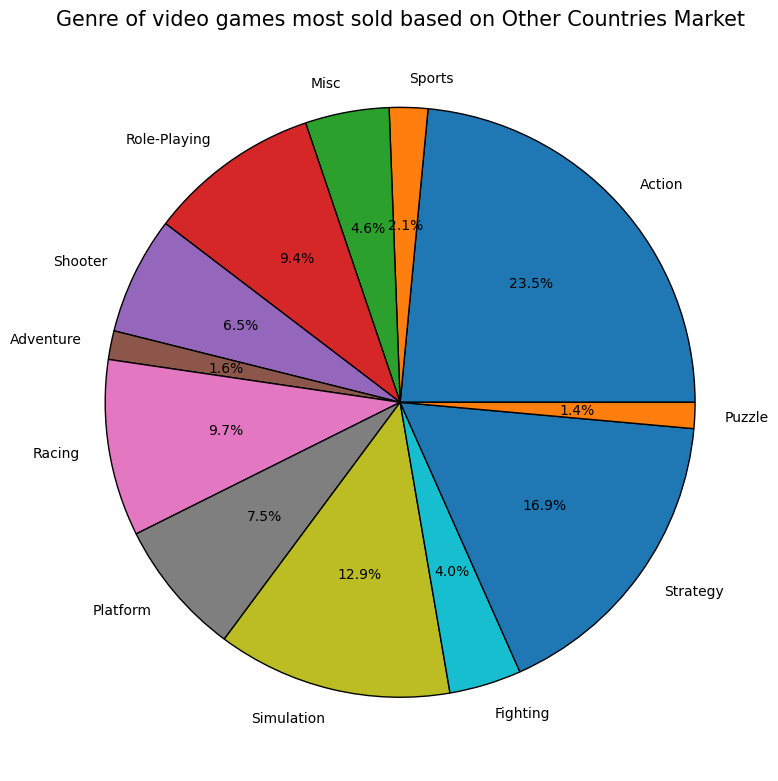

In [90]:
top_genres =df['genre'].value_counts()

Other_Sales = df.groupby('genre')['other_sales'].sum().values  

plt.figure(figsize=(8,8))

plt.pie(Other_Sales, labels=top_genres.index, wedgeprops={"edgecolor": "black"}, autopct="%1.1f%%")

plt.title("Genre of video games most sold based on Other Countries Market", fontsize=15)

plt.tight_layout()

plt.show()

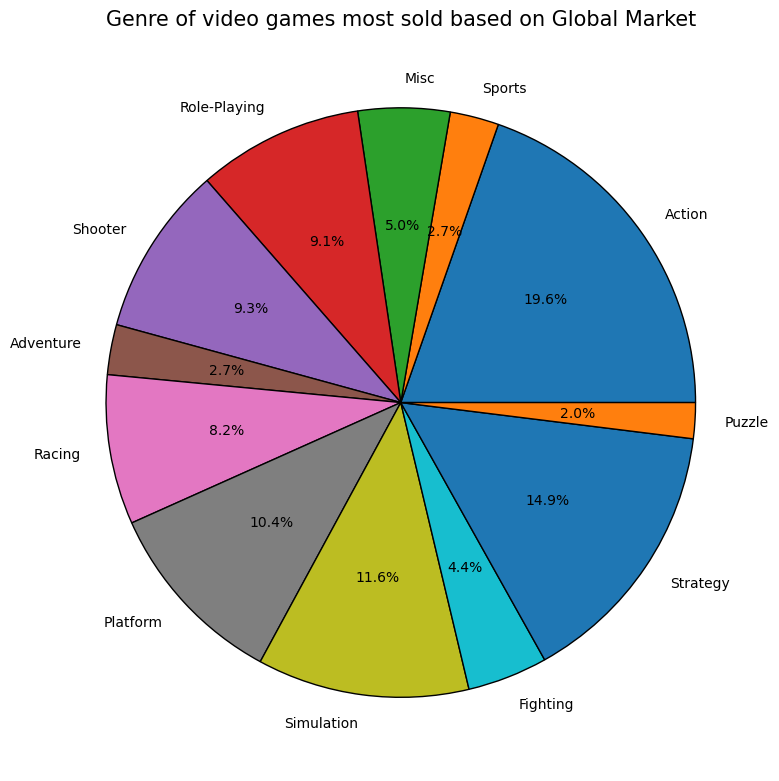

In [91]:
top_genres =df['genre'].value_counts()
Global_Sales = df.groupby('genre')['global_sales'].sum().values  

plt.figure(figsize=(8,8))

plt.pie(Global_Sales, labels=top_genres.index, wedgeprops={"edgecolor": "black"}, autopct="%1.1f%%")

plt.title("Genre of video games most sold based on Global Market", fontsize=15)

plt.tight_layout()

plt.show()


## HEATMAP CORRELATION

In [92]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [94]:
# Correlation Heatmap using Seaborn
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Wii Sports'

In [95]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Wii Sports'

<AxesSubplot: >

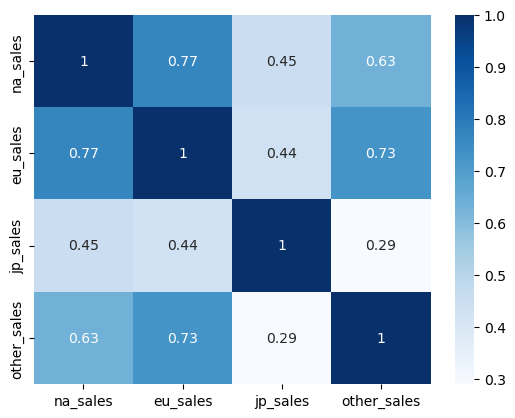

In [96]:
sns.heatmap(df[["na_sales","eu_sales","jp_sales","other_sales"]].corr(),annot =True,cmap="Blues")

## Histogram

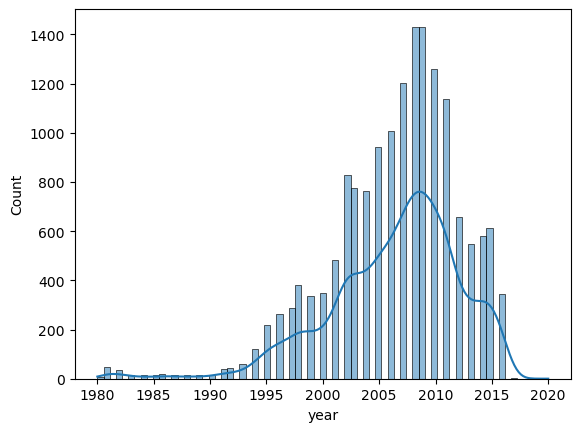

In [97]:
sns.histplot(df['year'], kde=True) 
plt.show()  

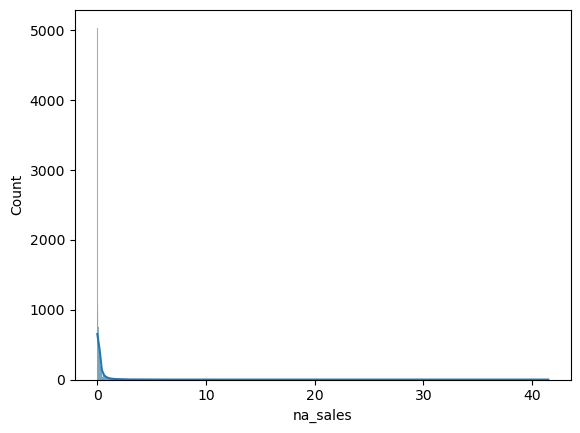

In [98]:
sns.histplot(df['na_sales'], kde=True) 
plt.show()  

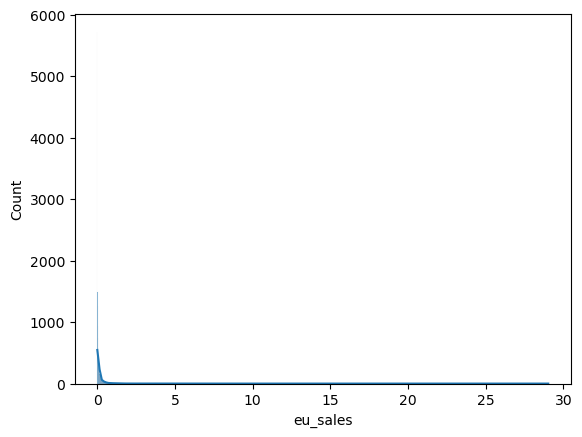

In [99]:
sns.histplot(df['eu_sales'], kde=True) 
plt.show() 

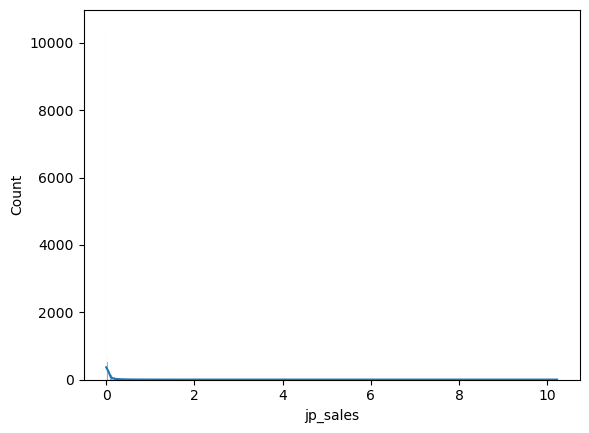

In [100]:
sns.histplot(df['jp_sales'], kde=True) 
plt.show() 

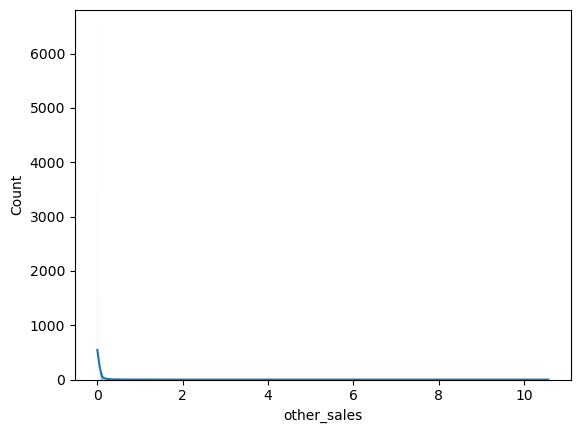

In [101]:
sns.histplot(df['other_sales'], kde=True) 
plt.show() 

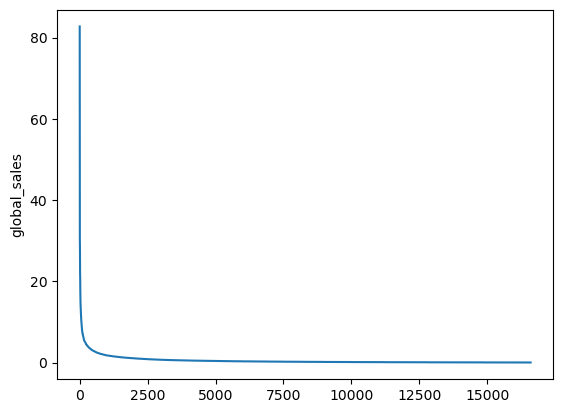

In [102]:
sns.lineplot(data=df,x=df.index,y=df['global_sales']) 
plt.show() 

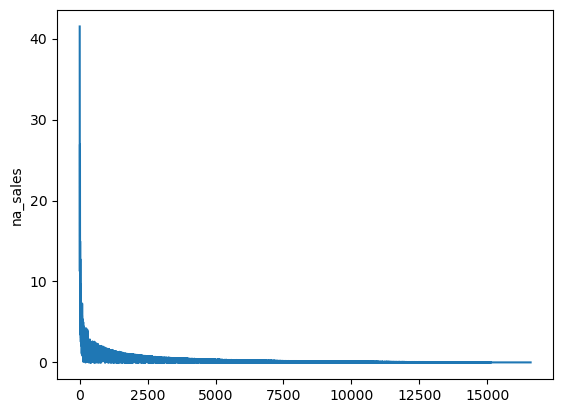

In [103]:
sns.lineplot(data=df,x=df.index,y=df['na_sales']) 
plt.show() 

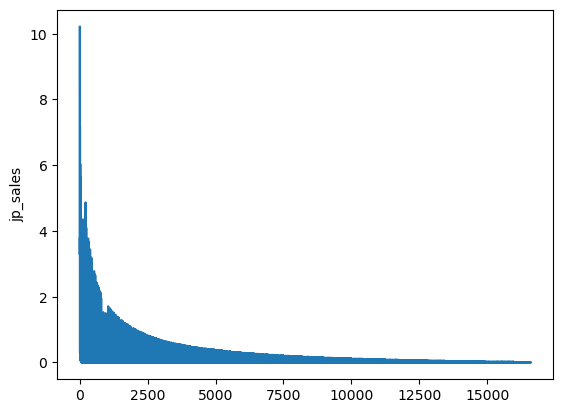

In [104]:
sns.lineplot(data=df,x=df.index,y=df['jp_sales']) 
plt.show() 

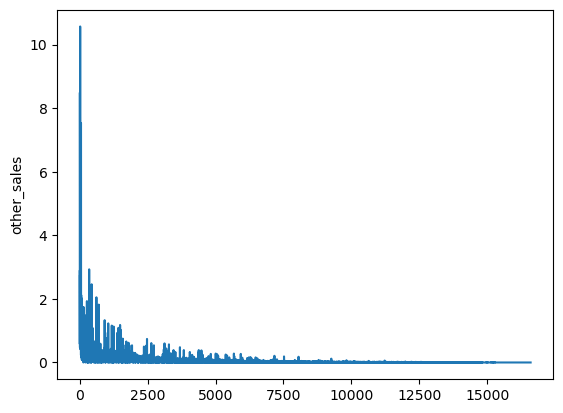

In [69]:
sns.lineplot(data=df,x=df.index,y=df['other_sales']) 
plt.show() 

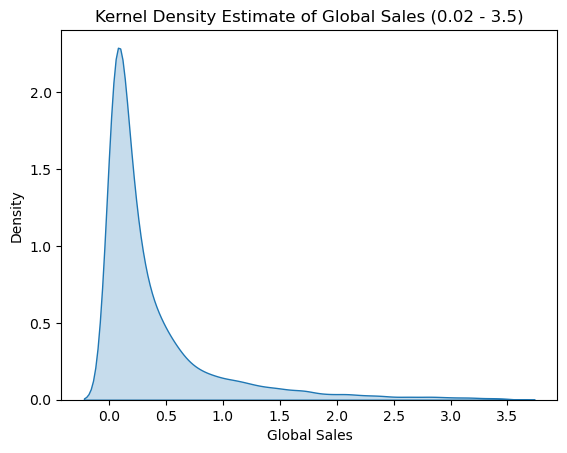

In [70]:
filtered_df = df[(df['global_sales'] >= 0.02) & (df['global_sales'] <= 3.5)]

# Create a KDE plot for the filtered data
sns.kdeplot(filtered_df['global_sales'], shade=True)
plt.xlabel('Global Sales')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Global Sales (0.02 - 3.5)')
plt.show()


In [71]:
df['jp_sales'].value_counts()

jp_sales
0.00    10455
0.02      728
0.01      704
0.03      528
0.04      397
        ...  
2.32        1
2.47        1
3.00        1
2.55        1
1.91        1
Name: count, Length: 244, dtype: int64

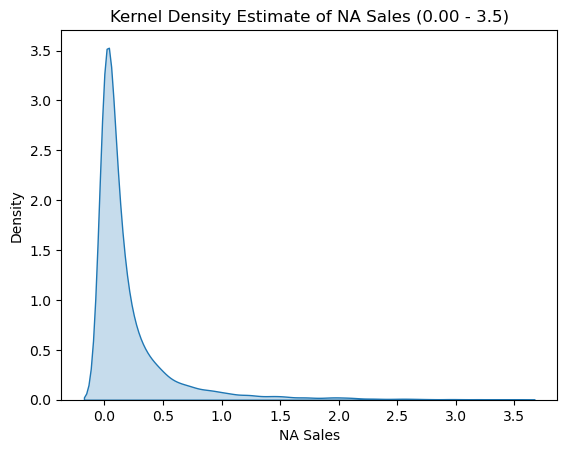

In [72]:
filtered_df = df[(df['na_sales'] >= 0.00) & (df['na_sales'] <= 3.5)]

# Create a KDE plot for the filtered data
sns.kdeplot(filtered_df['na_sales'], shade=True)
plt.xlabel('NA Sales')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of NA Sales (0.00 - 3.5)')
plt.show()

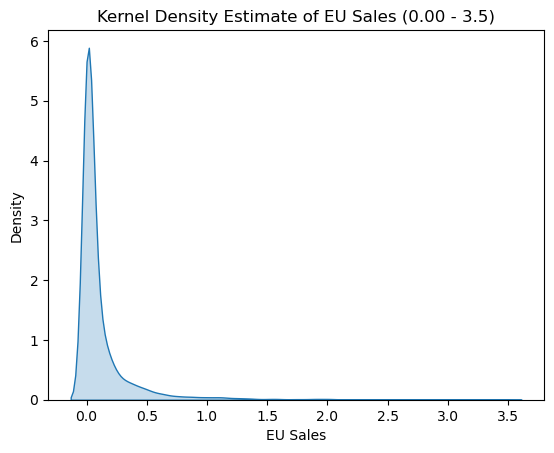

In [73]:
filtered_df = df[(df['eu_sales'] >= 0.00) & (df['eu_sales'] <= 3.5)]

# Create a KDE plot for the filtered data
sns.kdeplot(filtered_df['eu_sales'], shade=True)
plt.xlabel('EU Sales')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of EU Sales (0.00 - 3.5)')
plt.show()

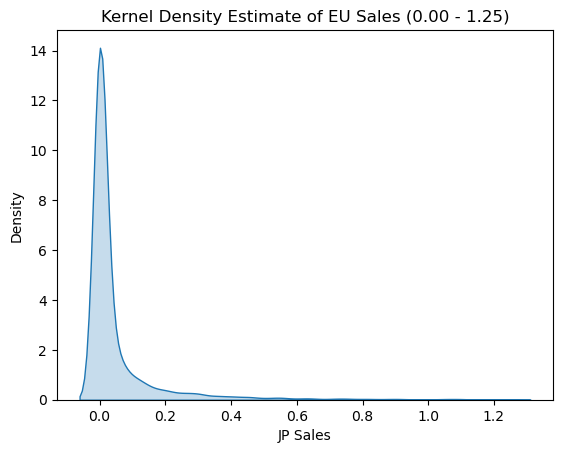

In [75]:
filtered_df = df[(df['jp_sales'] >= 0.00) & (df['jp_sales'] <= 1.25)]

# Create a KDE plot for the filtered data
sns.kdeplot(filtered_df['jp_sales'], shade=True)
plt.xlabel('JP Sales')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of EU Sales (0.00 - 1.25)')
plt.show()

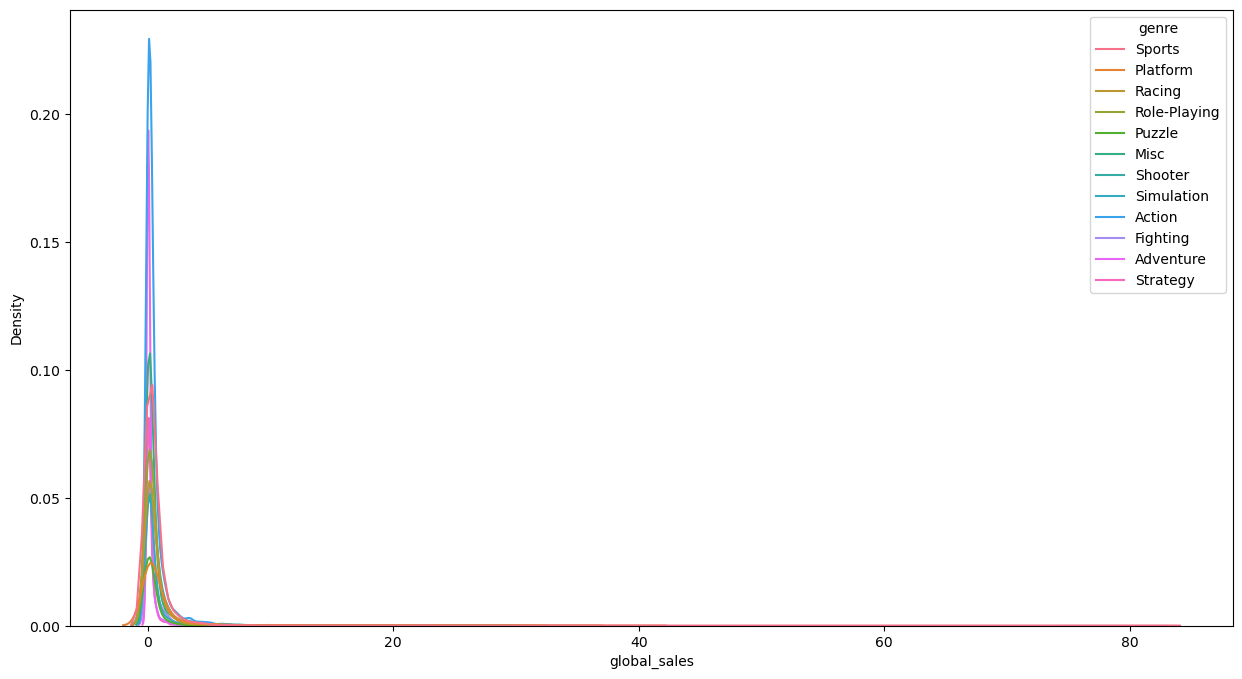

In [105]:
plt.figure(figsize=(15,8))
sns.kdeplot(data  = df , x = 'global_sales' , hue = 'genre'  )
plt.show()